In [4]:
import pandas as pd
import matplotlib.pyplot as plt


# **Première partie**


## Loading the Data

In [5]:
rot_tom_rev_path_1 = "../data/raw/rotten_tomatoes_critic_reviews_1.csv"
rot_tom_rev_path_0 = "../data/raw/rotten_tomatoes_movie_reviews_0.csv"

rot_tom_movie_path_0 = "../data/raw/rotten_tomatoes_movies_0.csv"
rot_tom_movie_path_1 = "../data/raw/rotten_tomatoes_movies_1.csv"


movie_info_path_2 = '../data/raw/movie_info_2.csv'

rot_tom_movie_path_3 = '../data/raw/rotten_tomatoes_top_movies_3.csv'


movie_metadata = "../data/raw/movie.metadata.tsv"
character_metadata = '../data/raw/character.metadata.tsv'





## Put the csvs' in dataFrames

In [6]:
movies_df_2 = pd.read_csv(movie_info_path_2)


In [ ]:
movies_df_0 = pd.read_csv(rot_tom_movie_path_0)
movies_df_1 = pd.read_csv(rot_tom_movie_path_1)

In [8]:
reviews_df_0 = pd.read_csv(rot_tom_rev_path_0)
reviews_df_1 = pd.read_csv(rot_tom_rev_path_1)

In [9]:
movies_df_3 = pd.read_csv(rot_tom_movie_path_3)
movies_df_3 = movies_df_3.loc[:, ~movies_df_3.columns.str.contains('^Unnamed')]

## Details of the content:


# Analysis of Rotten Tomatoes Movies & Reviews Datasets

This notebook explores two datasets containing information about Rotten Tomatoes movies and reviews.

## **Links and Source**
- **Data Source:** [Kaggle - Massive Rotten Tomatoes Movies & Reviews](https://www.kaggle.com/datasets/andrezaza/clapper-massive-rotten-tomatoes-movies-and-reviews?select=rotten_tomatoes_movies.csv)
- **Available Files:**
  - `rotten_tomatoes_movie_reviews_0.csv`
  - `rotten_tomatoes_movies_0.csv`

---

## **Dataset Structure**

### 1️⃣ **Reviews Dataset** (`rotten_tomatoes_movie_reviews_0.csv`)

This dataset contains information about movie reviews.

| **Column**        | **Description**                                                                                 |
|--------------------|-----------------------------------------------------------------------------------------------|
| `id`              | Unique identifier for each movie (matches the ID in the movies dataset).                       |
| `reviewId`        | Unique identifier for each critic review.                                                      |
| `creationDate`    | The date the review was published.                                                             |
| `criticName`      | Name of the critic who wrote the review.                                                       |
| `isTopCritic`     | Indicates if the critic is considered a "Top Critic" (`True` or `False`).                      |
| `originalScore`   | The score provided by the critic.                                                              |
| `reviewState`     | The status of the review (e.g., `fresh`, `rotten`).                                            |
| `publicatioName`  | The name of the publication where the review was published.                                    |
| `reviewText`      | The full text of the critic review.                                                            |
| `scoreSentiment`  | The sentiment of the critic's score (e.g., `positive`, `negative`, `neutral`).                 |

---

### 2️⃣ **Movies Dataset** (`rotten_tomatoes_movies_0.csv`)

This dataset contains detailed information about movies.

| **Column**             | **Description**                                                                       |
|-------------------------|---------------------------------------------------------------------------------------|
| `id`                   | Unique identifier for each movie.                                                     |
| `title`                | The title of the movie.                                                               |
| `audienceScore`        | The average score given by regular viewers.                                           |
| `tomatoMeter`          | The percentage of positive reviews from professional critics.                         |
| `rating`               | The movie's age-based classification (e.g., `G`, `PG`, `PG-13`, `R`).                |
| `ratingContents`       | Reasons for the age-based classification.                                             |
| `releaseDateTheaters`  | The date the movie was released in theaters.                                          |
| `releaseDateStreaming` | The date the movie became available for streaming.                                    |
| `runtimeMinutes`       | The movie's duration in minutes.                                                      |
| `genre`                | The movie's genre(s).                                                                 |

---




In [15]:

character_metadata = pd.read_csv(character_metadata, sep='\t', header=None)

In [16]:
movie_metadata = pd.read_csv(movie_metadata, sep='\t', header=None)

## rotten_tomatoes_movies_0.csv

In [ ]:
from ipywidgets import interact
import pandas as pd
import matplotlib.pyplot as plt

# Define the color palette
COLOR_PALETTE = ["#332288", "#88ccee", "#e69f00", "#44aa99", "#f0e442", "#d55e00", "#882255", "#009e73"]


df = pd.read_csv(rot_tom_movie_path_0)

def display_chart(movie):
    
    movie_data = df[df['title'].str.lower() == movie.lower()]
    
    if movie_data.empty:
        print("Movie not found. Try another title.")
        return
    else:
      
        scores = {}
        if pd.notna(movie_data['audienceScore'].values[0]):
            scores['Audience Score'] = movie_data['audienceScore'].values[0]
        if pd.notna(movie_data['tomatoMeter'].values[0]):
            scores['Tomatometer'] = movie_data['tomatoMeter'].values[0]
        
     
        if not scores:
            print("No scores available for this movie.")
            return
        
    
        is_comedy = movie_data['genre'].str.contains('Comedy', case=False, na=False).values[0]


        bar_colors = [COLOR_PALETTE[4], COLOR_PALETTE[2]] if is_comedy else [COLOR_PALETTE[1], COLOR_PALETTE[3]]

        labels = list(scores.keys())
        values = list(scores.values())
        
        fig, ax = plt.subplots(figsize=(8, 5))
        
      
        bars = ax.bar(labels, values, color=bar_colors[:len(values)])
        

        for bar, score in zip(bars, values):
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 5, 
                    f'{score}%', ha='center', va='bottom', fontsize=12, color='black')
        
        #Title (comedy or not)
        genre_info = "(Comedy)" if is_comedy else "(Non-Comedy)"
        ax.set_title(f'Scores for "{movie}" {genre_info}', fontsize=14)
        ax.set_xlabel('Score Type', fontsize=12)
        ax.set_ylabel('Score (%)', fontsize=12)
        
        plt.tight_layout()
        plt.show()

interact(display_chart, movie="Enter the movie title here")

interactive(children=(Text(value='Enter the movie title here', description='movie'), Output()), _dom_classes=(…

<function __main__.display_chart(movie)>

## Original dataset

In [17]:
movie_metadata.columns = ['Wikipedia_movie_ID', 'Freebase_movie_ID', 'Movie_name', 'Release_date', 'Box_office_revenue', 
              'Runtime', 'Languages', 'Countries', 'Genres']



character_metadata.columns = ['Wikipedia_movie_ID', 'Freebase_movie_ID', 'Release_date', 'Character_name', 
                              'Actor_dob', 'Actor_gender', 'Actor_height', 'Actor_ethnicity', 
                              'Actor_name', 'Actor_age_at_release', 'Freebase_char_actor_map_ID', 
                              'Freebase_char_ID', 'Freebase_actor_ID']



## Filtering to only keep comedy related movies


In [ ]:

comedy_movies_0 = movies_df_0[movies_df_0['genre'].str.contains("comedy", case=False, na=False)]

comedy_movies_0.head(2)

,id,title,audienceScore,tomatoMeter,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,writer,boxOffice,distributor,soundMix
0,space-zombie-bingo,Space Zombie Bingo!,50.0,NaN,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,George Ormrod,"George Ormrod,John Sabotta",NaN,NaN,NaN
6,malta-con-huevo-scrambled-beer,Scrambled Beer,55.0,NaN,NaN,NaN,NaN,2015-10-05,88.0,Comedy,Spanish,Cristobal Valderrama,Cristobal Valderrama,NaN,NaN,NaN


==========================================================================================================================================
==========================================================================================================================================



In [59]:
def preprocessing_rt_rev_ds(reviews_file_path, movies_file_path):

    try:
        # Load the datasets
        reviews_df = pd.read_csv(reviews_file_path)
        movies_df = pd.read_csv(movies_file_path)
        
        # Quick check
        print(f"Reviews Dataset: {reviews_df.shape[0]} rows, {reviews_df.shape[1]} columns")
        print(f"Movies Dataset: {movies_df.shape[0]} rows, {movies_df.shape[1]} columns")
        
        # Merge the datasets on 'id'
        combined_df = pd.merge(reviews_df, movies_df, on="id", how="inner")
        
        print(f"Combined Dataset: {combined_df.shape[0]} rows, {combined_df.shape[1]} columns")
        
        # Return the combined DataFrame
        return combined_df
    
    except FileNotFoundError as e:
        print(f"Error: {e}")
    except Exception as e:
        print(f"An error occurred: {e}")

In [61]:
combined_df = preprocessing_rt_rev_ds(rot_tom_rev_path_0, rot_tom_movie_path_0)
combined_df.head()
    


Reviews Dataset: 1444963 rows, 11 columns
Movies Dataset: 143258 rows, 16 columns
Combined Dataset: 1469543 rows, 26 columns


,id,reviewId,creationDate,criticName,isTopCritic,originalScore,reviewState,publicatioName,reviewText,scoreSentiment,...,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,writer,boxOffice,distributor,soundMix
0,beavers,1145982,2003-05-23,Ivan M. Lincoln,False,3.5/4,fresh,Deseret News (Salt Lake City),Timed to be just long enough for most youngste...,POSITIVE,...,NaN,2011-06-21,30.0,Documentary,English,Stephen Low,NaN,NaN,NaN,NaN
1,blood_mask,1636744,2007-06-02,The Foywonder,False,1/5,rotten,Dread Central,It doesn't matter if a movie costs 300 million...,NEGATIVE,...,NaN,NaN,NaN,NaN,NaN,Unknown Director,NaN,NaN,NaN,NaN
2,city_hunter_shinjuku_private_eyes,2590987,2019-05-28,Reuben Baron,False,NaN,fresh,CBR,The choreography is so precise and lifelike at...,POSITIVE,...,NaN,NaN,NaN,NaN,NaN,Kenji Kodama,NaN,NaN,NaN,NaN
3,city_hunter_shinjuku_private_eyes,2558908,2019-02-14,Matt Schley,False,2.5/5,rotten,Japan Times,The film's out-of-touch attempts at humor may ...,NEGATIVE,...,NaN,NaN,NaN,NaN,NaN,Kenji Kodama,NaN,NaN,NaN,NaN
4,dangerous_men_2015,2504681,2018-08-29,Pat Padua,False,NaN,fresh,DCist,Its clumsy determination is endearing and some...,POSITIVE,...,NaN,NaN,NaN,NaN,NaN,Unknown Director,NaN,NaN,NaN,NaN


In [67]:
from ipywidgets import interact
import pandas as pd
import matplotlib.pyplot as plt

# Define the color palette
COLOR_PALETTE = ["#332288", "#88ccee", "#e69f00", "#44aa99", "#f0e442", "#d55e00", "#882255", "#009e73"]



def display_chart(movie):
    
    movie_data = combined_df[combined_df['title'].str.lower() == movie.lower()]
    
    if movie_data.empty:
        print("Movie not found. Try another title.")
        return
    else:
      
        scores = {}
        if pd.notna(movie_data['audienceScore'].values[0]):
            scores['Audience Score'] = movie_data['audienceScore'].values[0]
        if pd.notna(movie_data['tomatoMeter'].values[0]):
            scores['Tomatometer'] = movie_data['tomatoMeter'].values[0]
        
     
        if not scores:
            print("No scores available for this movie.")
            return
        
    
        is_comedy = movie_data['genre'].str.contains('Comedy', case=False, na=False).values[0]


        bar_colors = [COLOR_PALETTE[4], COLOR_PALETTE[2]] if is_comedy else [COLOR_PALETTE[1], COLOR_PALETTE[3]]

        labels = list(scores.keys())
        values = list(scores.values())
        
        fig, ax = plt.subplots(figsize=(8, 5))
        
      
        bars = ax.bar(labels, values, color=bar_colors[:len(values)])
        

        for bar, score in zip(bars, values):
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 5, 
                    f'{score}%', ha='center', va='bottom', fontsize=12, color='black')
        
        #Title (comedy or not)
        genre_info = "(Comedy)" if is_comedy else "(Non-Comedy)"
        ax.set_title(f'Scores for "{movie}" {genre_info}', fontsize=14)
        ax.set_xlabel('Score Type', fontsize=12)
        ax.set_ylabel('Score (%)', fontsize=12)
        
        plt.tight_layout()
        plt.show()

interact(display_chart, movie="Enter the movie title here")

interactive(children=(Text(value='Enter the movie title here', description='movie'), Output()), _dom_classes=(…

<function __main__.display_chart(movie)>

In [68]:
def filter_comedy_review():
    return combined_df['genre'].str.contains('Comedy', case=False, na=False).values[0]

In [69]:

COLOR_PALETTE = ["#332288", "#88ccee", "#e69f00", "#44aa99", "#f0e442", "#d55e00", "#882255", "#009e73"]

def most_frequent_comedy_genre():


    comedy_df = filter_comedy_review()

    # Collect associated genres
    associated_genres = []

    for genre_list in comedy_movies_0['genre'].str.lower().str.split(',\s*'):
        # Add all genres except "comedy" to the temporary list
        associated_genres.extend([genre for genre in genre_list if genre != "comedy"])

    associated_genre_counts = pd.Series(associated_genres).value_counts()

    print(associated_genre_counts.head(10))

    fig, ax = plt.subplots(figsize=(10, 6))

    associated_genre_counts.head(10).plot(kind='bar', color=COLOR_PALETTE[:10], ax=ax)

    ax.set_title('Most Frequent Genres Associated with "Comedy"', fontsize=14)
    ax.set_xlabel('Associated Genre', fontsize=12)
    ax.set_ylabel('Number of Movies', fontsize=12)

    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


drama                 8244
romance               4767
kids & family         1523
adventure             1488
action                1354
horror                1262
animation             1252
musical               1024
fantasy                952
mystery & thriller     925
Name: count, dtype: int64


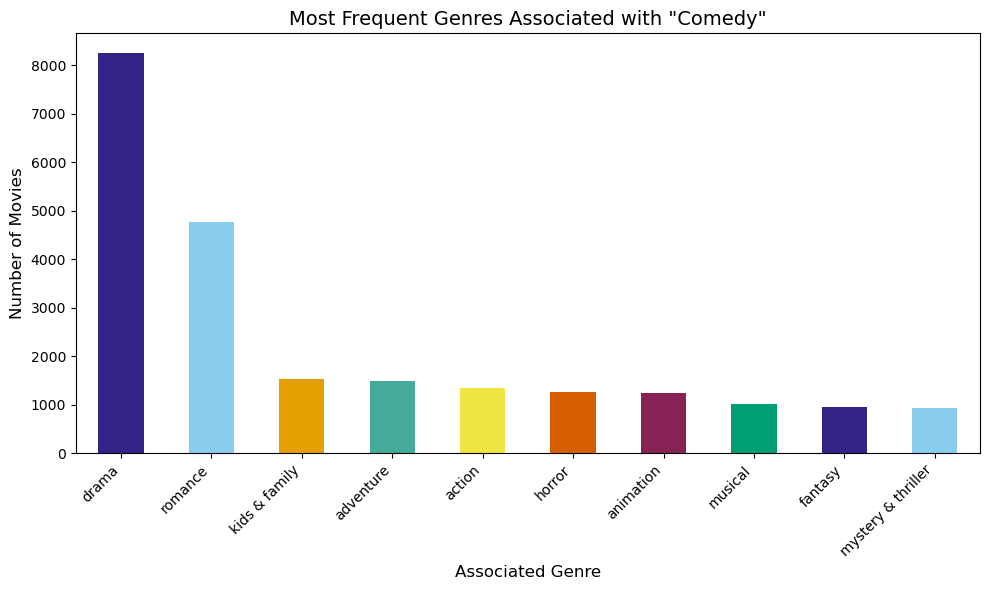

In [70]:
most_frequent_comedy_genre()

==============================================================================================================================================================================================================================================================================================================================

In [23]:
# Calculer le nombre de films qui sont uniquement "Comedy"
just_comedy_count = comedy_movies_0[comedy_movies_0['genre'].str.strip().str.lower() == "comedy"].shape[0]

# Calculer le nombre de films "Comedy" associés à d'autres genres
associated_genres_count = comedy_movies_0.shape[0] - just_comedy_count

# Calculer les proportions en pourcentage
total_comedy_movies = comedy_movies_0.shape[0]
just_comedy_proportion = just_comedy_count / total_comedy_movies * 100
associated_genres_proportion = associated_genres_count / total_comedy_movies * 100

# Afficher les résultats
print(f"Proportion de films uniquement 'Comedy': {just_comedy_proportion:.2f}%")
print(f"Proportion de films 'Comedy' associé à d'autres genres: {associated_genres_proportion:.2f}%")

Proportion de films uniquement 'Comedy': 38.28%
Proportion de films 'Comedy' associé à d'autres genres: 61.72%


Analyse of the "review" dataset:

In [24]:
initial_size = reviews_df_0.shape[0]
print(f"Taille de reviews_df avant le filtrage : {initial_size} lignes")

Taille de reviews_df avant le filtrage : 1444963 lignes


In [25]:
comedy_movies_1 = movies_df_1[movies_df_1['genres'].str.contains("comedy", case=False, na=False)]

comedy_movies_1.head(2)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19


## Merge btw review 0 and comedy 0

In [26]:
merged_df_0 = pd.merge(comedy_movies_0, reviews_df_0, on='id', how='inner')

In [27]:
merged_df_0.head(2)

,id,title,audienceScore,tomatoMeter,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,...,reviewId,creationDate,criticName,isTopCritic,originalScore,reviewState,publicatioName,reviewText,scoreSentiment,reviewUrl
0,the_last_gentleman,The Last Gentleman,NaN,NaN,NaN,NaN,NaN,NaN,80.0,Comedy,...,2684805,2020-04-21,Meyer Levin (Patterson Murphy),False,NaN,rotten,Esquire Magazine,...so crammed with sentimental rubbish that it...,NEGATIVE,https://classic.esquire.com/article/1934/10/1/...
1,the_last_gentleman,The Last Gentleman,NaN,NaN,NaN,NaN,NaN,NaN,80.0,Comedy,...,2607721,2019-07-23,Ann Ross,False,NaN,fresh,Maclean's Magazine,The whole family can go to The Last Gentleman ...,POSITIVE,https://archive.macleans.ca/article/1934/9/15/...


# Merge btw comedy 1 and review 1

In [30]:
merged_df_1 = pd.merge(movies_df_1, reviews_df_1, on='rotten_tomatoes_link', how='inner')

In [31]:
merged_df_1.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,43,73,76,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,43,73,76,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,43,73,76,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,43,73,76,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,43,73,76,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...


## Audiance vs critic

## 2 and 3

In [32]:
movies_df_2.head()

,title,url,release_date,critic_score,audience_score
0,Love Story,https://www.rottentomatoes.com/m/love_story,"Released Dec 16, 1970",63%,75%
1,Airport,https://www.rottentomatoes.com/m/airport,"Released Apr 5, 1970",75%,54%
2,M*A*S*H,https://www.rottentomatoes.com/m/mash,"Released Jan 30, 1970",84%,83%
3,Patton,https://www.rottentomatoes.com/m/patton,"Released Jan 25, 1970",91%,93%
4,The Aristocats,https://www.rottentomatoes.com/m/the_aristocats,1970,NaN,NaN


!!!!! Pas de lien avec le genre

In [34]:
movies_df_3.head(3)

,title,year,synopsis,critic_score,people_score,consensus,total_reviews,total_ratings,type,rating,...,release_date_(theaters),release_date_(streaming),box_office_(gross_usa),runtime,production_co,sound_mix,aspect_ratio,view_the_collection,crew,link
0,Black Panther,2018,"After the death of his father, T'Challa return...",96,79.0,Black Panther elevates superhero cinema to thr...,519,"50,000+",Action & Adventure,PG-13 (Sequences of Action Violence|A Brief Ru...,...,"Feb 16, 2018 wide","May 2, 2018",$700.2M,2h 14m,Walt Disney Pictures,"DTS, Dolby Atmos",Scope (2.35:1),Marvel Cinematic Universe,"Chadwick Boseman, Michael B. Jordan, Lupita Ny...",http://www.rottentomatoes.com/m/black_panther_...
1,Avengers: Endgame,2019,"Adrift in space with no food or water, Tony St...",94,90.0,"Exciting, entertaining, and emotionally impact...",538,"50,000+",Action & Adventure,PG-13 (Sequences of Sci-Fi Violence|Action|Som...,...,"Apr 26, 2019 wide","Jul 30, 2019",$858.4M,3h 1m,"Marvel Studios, Walt Disney Pictures","Dolby Atmos, DTS, Dolby Digital, SDDS",Scope (2.35:1),Marvel Cinematic Universe,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",http://www.rottentomatoes.com/m/avengers_endgame
2,Mission: Impossible -- Fallout,2018,Ethan Hunt and the IMF team join forces with C...,97,88.0,"Fast, sleek, and fun, Mission: Impossible - Fa...",433,"10,000+",Action & Adventure,PG-13 (Intense Sequences of Action|Brief Stron...,...,"Jul 27, 2018 wide","Nov 20, 2018",$220.1M,2h 27m,"Bad Robot, Tom Cruise","DTS, Dolby Atmos, Dolby Digital",Scope (2.35:1),NaN,"Tom Cruise, Henry Cavill, Ving Rhames, Simon P...",http://www.rottentomatoes.com/m/mission_imposs...


In [35]:
num_rows = movies_df_3.shape[0]
print(num_rows)

1610


In [36]:
comedy_movies_3_df = movies_df_3[movies_df_3['type'].str.contains("comedy", case=False, na=False)]

In [37]:
comedy_movies_3_df.head(3)

,title,year,synopsis,critic_score,people_score,consensus,total_reviews,total_ratings,type,rating,...,release_date_(theaters),release_date_(streaming),box_office_(gross_usa),runtime,production_co,sound_mix,aspect_ratio,view_the_collection,crew,link
400,It Happened One Night,1934,"In Frank Capra's acclaimed romantic comedy, sp...",99,93.0,Capturing its stars and director at their fine...,96,"25,000+",Comedy,NaN,...,NaN,"Apr 16, 2012",NaN,1h 45m,Columbia Pictures Corporation,Mono,"35mm, Flat (1.37:1)",NaN,"Claudette Colbert, Clark Gable, Walter Connoll...",http://www.rottentomatoes.com/m/it_happened_on...
401,Toy Story 4,2019,"Woody, Buzz Lightyear and the rest of the gang...",97,94.0,"Heartwarming, funny, and beautifully animated,...",450,"50,000+ Verified",Comedy,G,...,"Jun 21, 2019 wide","Oct 1, 2019",$434.0M,1h 40m,Pixar Animation Studios,"DTS, Dolby Digital, Dolby Atmos",Scope (2.35:1),Pixar,"Tom Hanks, Tim Allen, Annie Potts, Tony Hale, ...",http://www.rottentomatoes.com/m/toy_story_4
402,Lady Bird,2017,A teenager (Saoirse Ronan) navigates a loving ...,99,79.0,Lady Bird delivers fresh insights about the tu...,394,"10,000+",Comedy,R (Language|Brief Graphic Nudity|Sexual Conten...,...,"Nov 22, 2017 wide","Feb 13, 2018",$48.9M,1h 34m,"Scott Rudin Productions, A24",Dolby Digital,Flat (1.85:1),NaN,"Saoirse Ronan, Laurie Metcalf, Timothée Chalam...",http://www.rottentomatoes.com/m/lady_bird
